## Dataset 3 - Autism

This dataset provides 20 attributes to help determine if an adult could be on the autistic spectrum or have ASD. The data provided is based upon autism screening of adults in contrast to most other datasets based on behavior traits. In the dataset, 10 behavioral and 10 individual characteristics are provided.
https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult

#### Problem
Our goal is to create a classifier, that can diagnose autism based on the answers to certain questions and physical characteristics. This is a classification problem and very much mirrors our hypothetical situations of diagnosing cancer that we discuss in class. Except our features are more based around psychological evaluation and not physical traits and attributes of a physical ailment.

#### Extending the problem
Out of all of the datasets, this one has the most social impact, and the creation of such an algorithm is most likely already the subject of study in various academic realms.


### Dataset Description

### Loading the Dataset
The dataset is laid out in a .arff file and needs to be loaded properly so that we can use it. Fortunately, Scipy has a function to hanle this.

Some features, like the answers to test questions, are binary. While others like age are intgers, and others are strings. 

Some features are translated into binary features. Gender is taken as a binary feature, with 'False' being taken as male and 'True' being taken female.

In [1]:
from scipy.io import arff
import numpy as np

file = './Data/Autism/Autism-Adult-Data.arff'
filedata, metadata = arff.loadarff(file)

'''
print (metadata)
print (filedata[0])
'''
ethnicity = [b'?', b'White-European', b'Latino', b'Others', b'Black', b'Asian', b"'Middle Eastern '", b'Pasifika', b"'South Asian'", b'Hispanic', b'Turkish', b'others']
country_of_res = [b"'United States'", b'Brazil', b'Spain', b'Egypt', b"'New Zealand'", b'Bahamas', b'Burundi', b'Austria', b'Argentina', b'Jordan', b'Ireland', b"'United Arab Emirates'", b'Afghanistan', b'Lebanon', b"'United Kingdom'", b"'South Africa'", b'Italy', b'Pakistan', b'Bangladesh', b'Chile', b'France', b'China', b'Australia', b'Canada', b"'Saudi Arabia'", b'Netherlands', b'Romania', b'Sweden', b'Tonga', b'Oman', b'India', b'Philippines', b"'Sri Lanka'", b"'Sierra Leone'", b'Ethiopia', b"'Viet Nam'", b'Iran', b"'Costa Rica'", b'Germany', b'Mexico', b'Russia', b'Armenia', b'Iceland', b'Nicaragua', b"'Hong Kong'", b'Japan', b'Ukraine', b'Kazakhstan', b'AmericanSamoa', b'Uruguay', b'Serbia', b'Portugal', b'Malaysia', b'Ecuador', b'Niger', b'Belgium', b'Bolivia', b'Aruba', b'Finland', b'Turkey', b'Nepal', b'Indonesia', b'Angola', b'Azerbaijan', b'Iraq', b"'Czech Republic'", b'Cyprus']
relations = [b'?', b'Self', b'Parent', b"'Health care professional'", b'Relative', b'Others']

# Data is not properly typed and needs to be converted
data = [[None for _ in range(len(filedata[0]))] for _ in range(len(filedata))]
for i in range(len(filedata)):
    for j in range(len(filedata[i])):
        # Binary features, Answer Scores
        if (j < 10):
            if (filedata[i][j] == b'1'):
                data[i][j] = 1
            else:
                data[i][j] = 0
        # Integer Features, Age feature, Screen Score
        elif (j == 10 or j == 17):
            data[i][j] = filedata[i][j]
        # Gender Feature to binary
        elif (j == 11):
            if (filedata[i][j] == b'm'):
                data[i][j] = 0
            else:
                data[i][j] = 1
        # String features, Ethnicity, Country of Origin (enclossed in '' within the string), 18 or older, relation
        elif (j == 12 or j == 15 or j == 18 or j == 19):
            if (j == 12):
                data[i][j] = ethnicity.index(filedata[i][j])
            if (j == 15):
                data[i][j] = country_of_res.index(filedata[i][j])
            if (j == 19):
                data[i][j] = relations.index(filedata[i][j])
        # Jaundice, Family Member with a PDD, used the app before
        elif (j == 13 or j == 14 or j == 16):
            if (filedata[i][j] == b'yes'):
                data[i][j] = 1
            else:
                data[i][j] = 0
        # Final classification
        elif (j == 20):
            if (filedata[i][j] == b'YES'):
                data[i][j] = 1
            else:
                data[i][j] = 0

    # Make the row into a numpy array
    data[i] = np.array(data[i])

# Make the whole dataset into a numpy array
data = np.array(data)

# Transpose so that features are along the rows and data points are along the columns
data = data.transpose()

# Extract the label from the data
labels = data[20:,:]
data = data[:20,:]

# data is now the features matrix column wise and the labels are separated into a vector

### Cleaning the Dataset
With the data properly loaded, we need to look over our features and potentially clean or adjust the data.

In our dataset, there is an "18 years or older" feature, which is the same for every data point, a hold over from what can be assumed to be related to a legal obligation of an adult's consent to collect the data. Thus we can cut that feature out entirely from the beginning.

Additionally, we can elect to exclude other features which we are not interested in including in our analysis such as .

We can cut these out of our data:

In [2]:
# Remove '18 years or older' feature
data = np.delete(data, 18, axis=0)
# Remove 'Used app before' feature
data = np.delete(data, 16, axis=0)

### Do I need to normalize the values?

In some cases it may be necessary to normalize our features that we have selected. Lasso and Ridge regression put constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. It is therefore necessary to center and reduce, or standardize, the variables.

However in the case of pure linear regression, where there are no constraints on the size of the coefficients, normalization is not necessary.

In this example we have mostly binary features, with a couple of non-binary features like age, country of origin, ethnicity, and relation. For part 1, we will be doing a linear logistical regression.

In [3]:
# Convert integer features to floats
print (data)
print (data.shape)
print (data.T[12])

for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j] = float(data[i][j])

print (data)
print (data.shape)
print (data.T[12])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 ...
 [0 1 2 ... 40 17 66]
 [6.0 5.0 8.0 ... 7.0 6.0 8.0]
 [1 1 2 ... 0 1 1]]
(18, 704)
[0 1 1 1 1 1 0 0 1 0 17.0 1 0 0 0 5 6.0 0]
[[1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 1.0 0.0 1.0]
 ...
 [0.0 1.0 2.0 ... 40.0 17.0 66.0]
 [6.0 5.0 8.0 ... 7.0 6.0 8.0]
 [1.0 1.0 2.0 ... 0.0 1.0 1.0]]
(18, 704)
[0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 17.0 1.0 0.0 0.0 0.0 5.0 6.0 0.0]


### Analysing our Cleaned Data

This dataset required the most adjustment so that it can be used for the purposes of this project, mostly stemming from the use of an arff file for storing and distributing the data. In addition, not every feature was relevant as mentioned above. But now we can attempt to build a classifier around our data, to classify whether given ADS evaluation answers, and other factors, would lead to an ASD diagnosis. These are the 3 methods that will be used, along with the group member responsible for that method:

- Logistical Regression - Brooks Tawil
- Naive Bayes - Jack Chiu
- Classification Method 3 - Gavin Mckim

# Logistical Regression - Brooks Tawil

In logistical regression, we want to restrict the output to a value between - and 1, and using some threshold value, classify someone as having an autism diagnosis as 'YES' or 'NO'. This binary decision comes from finding the weights for the typical linear regression  methods and then restricting this equation by a sigmoid:

$\dot{p} = \frac{e^{b + w^Tx}}{1 + e^{b + w^Tx}}$

Where $\dot{p}$ is the probability that that $Y = 1$ for a given $X$.

We start by doing linear regression as before and arrive at the weights using a k-fold cross validation.

In [4]:
# Append a row of 1s for our linear regression
X = np.append(data, np.ones((data.shape[1], 1)).transpose(), axis=0).T
Y = np.array(labels).T

# Will run a k-folds cross validation with k=15
k = 15
errors = []
w_s = []
count = 0

# Allocate space for our folds and targets
folds = [[] for _ in range(k)]
targets = [[] for _ in range(k)]

# Assign indices to the data for shuffling
indices = []
for i in range(len(X)):
    indices.append(i)
import random
random.shuffle(indices)

# Split the data and targets into seperate blocks
count = 0
for index in indices:    
    folds[count].append(X[index])
    targets[count].append(Y[index])
    count += 1
    if(count == k):
        count = 0

The data is now split into folds and can be used to fit linear models. We will first do so for the autism dataset.

In [5]:
# Go through the folds of autsim test, form training and testing sets, fit a model, and calculate the error
for i in range(len(folds)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(len(folds)):
        if(i != j):
            for l in range(len(folds[j])):
                training_set.append(folds[j][l])
                training_targets.append(targets[j][l])
      
    # From the test_set
    test_set = np.array(folds[i]).astype(float)
    test_targets = np.array(targets[i]).astype(float)
    training_set = np.array(training_set).astype(float)
    training_targets = np.array(training_targets).astype(float)
    
    # Run the LS regression on the training sets to get a w
    w = np.linalg.inv(training_set.T @training_set) @ training_set.T @ training_targets
    
    # Use the found w to calculate y' on the test set
    yHat = test_set @ w
    
    # Calculate the LS error 
    sumSquare = 0.0
    for j in range(len(test_set)):
        sumSquare += float(np.square(np.subtract(test_targets[i], yHat[i])))
    sumSquare = sumSquare/len(test_set)
        
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    errors.append(sumSquare)
    
    w_s.append(w)
    
print ('Errors: ' + str(errors))
print ('Average regression error: \t' + str(np.mean(errors)))

# Get the w that gives the smallest error
best_w = w_s[np.argmin(errors)]

# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = X.astype(float) @ best_w

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], Y[i]))
sumSquare = float(sumSquare/len(yHat))

print ('Weights: \n', best_w)
print ('Mean regression error using best w: ' + str(sumSquare))
print ()

Test Set 0 Error: 0.2023603904163309
Test Set 1 Error: 175.11288260029963
Test Set 2 Error: 1.5891076576806127
Test Set 3 Error: 0.19125528191444272
Test Set 4 Error: 2.1110620635826898
Test Set 5 Error: 19.661059718835308
Test Set 6 Error: 1.5780134825884031
Test Set 7 Error: 0.09823792459052376
Test Set 8 Error: 0.10536029771465695
Test Set 9 Error: 24.925110915237305
Test Set 10 Error: 0.054840978833232724
Test Set 11 Error: 0.2899048342066503
Test Set 12 Error: 0.4770458239740553
Test Set 13 Error: 0.4013511020817855
Test Set 14 Error: 3.3445529394415894e+30
Errors: [0.2023603904163309, 175.11288260029963, 1.5891076576806127, 0.19125528191444272, 2.1110620635826898, 19.661059718835308, 1.5780134825884031, 0.09823792459052376, 0.10536029771465695, 24.925110915237305, 0.054840978833232724, 0.2899048342066503, 0.4770458239740553, 0.4013511020817855, 3.3445529394415894e+30]
Average regression error: 	2.229701959627726e+29
Weights: 
 [[-1.72372458e-01]
 [-2.18640538e-01]
 [-1.61235052e-

With the weight vector $w$ found, we can no model our regression model just as before. However now we restrict the output to be within $[0,1]$ using the sigmoid function described above.

In [7]:
# For each of our datapoints, we can calculate a value of p
# Where p is the probability that the data point results in a diagnosis of Autism.

probability = np.exp(X.astype(float) @ best_w) / (1 + np.exp(X.astype(float) @ best_w))

# Here we can set a threshold, alpha, and using cross validation arrive at an alpha that gives the error
alphas = np.linspace(0.0, 1.0, num=50)
classifications = [[None for _ in range(len(data[0]))] for _ in range(len(alphas))]

# Assign the classes
for i in range(len(alphas)):
    for j in range(len(probability)):
        # Check against threshold, give binary assignment of yes or no
        if (probability[j] > alphas[i]):
            classifications[i][j] = True
        else:
            classifications[i][j] = False
            

# True Positives, True Negatives, False Positives, and False Negatives for each of the alphas used
TPs = [0 for _ in range(len(classifications))]
TNs = [0 for _ in range(len(classifications))]
FPs = [0 for _ in range(len(classifications))]
FNs = [0 for _ in range(len(classifications))]

# Take tallies of the TPs, TNs, FPs, FNs
for i in range(len(classifications)):
    for j in range(len(classifications[i])):
        # True Positive
        if (classifications[i][j] == Y[j] and Y[j] == True):
            TPs[i] = TPs[i] + 1
        # True Negative
        elif (classifications[i][j] == Y[j] and Y[j] == False):
            TNs[i] = TNs[i] + 1
        # False Positive
        elif (classifications[i][j] != Y[j] and Y[j] == False):
            FPs[i] = FPs[i] + 1
        # False Negative
        else:
            FNs[i] = FNs[i] + 1

# For our purposes, lets select the alpha that gives the highest accuracy
accuracies = [0 for _ in range(len(classifications))]

for i in range(len(alphas)):
    accuracies[i] = (TPs[i] + TNs[i])/float(len(probability))
    
print (accuracies)
best_alpha = alphas[np.argmax(accuracies)]

print()
print ('Best Alpha: ', best_alpha)

[0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.2684659090909091, 0.26988636363636365, 0.27698863636363635, 0.28551136363636365, 0.2940340909090909, 0.3380681818181818, 0.3835227272727273, 0.4446022727272727, 0.4786931818181818, 0.5326704545454546, 0.625, 0.6917613636363636, 0.7372159090909091, 0.8053977272727273, 0.8352272727272727, 0.8494318181818182, 0.8664772727272727, 0.8380681818181818, 0.8267045454545454, 0.796875, 0.7471590909090909, 0.7400568181818182, 0.7372159090909091, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909, 0.7315340909090909]

Best Alpha:  0.632

### ROC Curve
Since we need to cross validate our alpha value for a binary classification, the use of an ROC curve would help in evaluating how good our classifier as a whole. Additionally, some values of alpha may give a higher classification error, but they may have a smaller false positive rate. As a machine learning engineer, its important to consider the effect that your algorithms have on people. Especially with diagnosis, we may aim to want to err on the side of caution, and have a higher false positive rate in order to minimize the false negative rate.

Here we plot the ROC curve for a bunch of alpha thresholds, taking note that in some instances, it may be worth it to pick alpha values that favor more false positives. Whether a higher false positive rate is what is truly desired in these diagnosis is beyond the scope of this assignment as there are arguments to be made for both sides that we simply do not have enough knowledge, or time, to deal with.

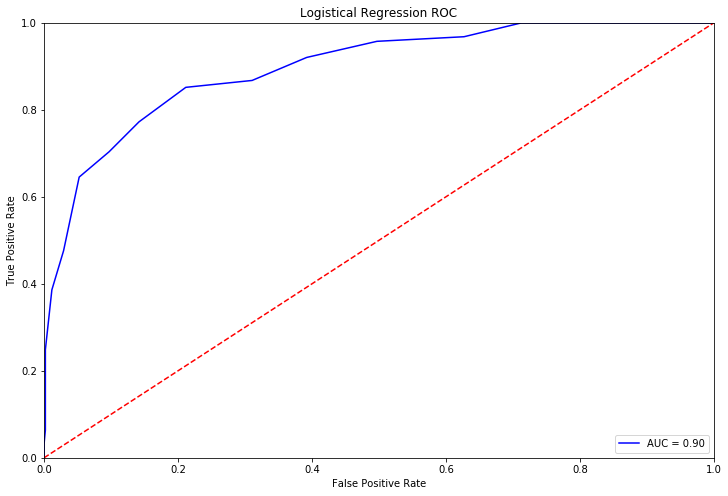

In [9]:
# First calculate the TPRs and FPRs
FPRs = [0 for _ in range(len(classifications))]
TPRs = [0 for _ in range(len(classifications))]

for i in range(len(alphas)):
    FPRs[i] = (FPs[i])/float(FPs[i] + TNs[i])
    TPRs[i] = (TPs[i])/float(TPs[i] + FNs[i])

# Uses the metrics package under sklearn to easily find the AUC
from sklearn import metrics
import matplotlib.pyplot as plt

roc_auc = metrics.auc(FPRs, TPRs)

plt.figure(figsize=(12, 8))
plt.title('Logistical Regression ROC')
plt.plot(FPRs, TPRs, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes - Jack Chui

In [ ]:
import numpy as np
import arff as ARFF

def uNiQuE(vec):
    popCtr = 0
    for p in vec:
        if p in vec[:popCtr]:
            vec = np.delete(vec, popCtr, 0)
            popCtr -= 1
        popCtr += 1
        
    return vec

def preProcess(data):
    i = 0
    for q in range(len(data)):
        if None in data[i] or data[i,10] == 383:
            data = np.delete(data, i, 0)
            i -= 1        
        i += 1

        for j in range(len(data[i-1])):
            if type(data[i-1,j]) == str:
                data[i-1,j] = data[i-1,j].lower()
    
    labels = data[:,-1]
    data = np.delete(data, -1, 1)
    
    ethnicities = uNiQuE(data[:,12])
    countries = uNiQuE(data[:,15])
    completed = uNiQuE(data[:,-1])
    yesNo = np.array(['no', 'yes'])
    ageVec = np.arange(20,80, 10)
    for i in range(len(data)):
        data[i,:10] = data[i,:10].astype(int)
        
        tempInd = np.where(ageVec > int(data[i,10]))
        data[i,10] = int(tempInd[0][0])
    
        if data[i,11] == 'm':
            data[i,11] = 1
        else:
            data[i,11] = 0
        tempInd = np.where(ethnicities == data[i,12])
        data[i,12] = int(tempInd[0])
        
        tempInd = np.where(yesNo == data[i,13])
        data[i,13] = int(tempInd[0])
        tempInd = np.where(yesNo == data[i,14])
        data[i,14] = int(tempInd[0])
        
        tempInd = np.where(countries == data[i,15])
        data[i,15] = int(tempInd[0])
        
        tempInd = np.where(yesNo == data[i,16])
        data[i,16] = int(tempInd[0])
        
        data[i,17] = int(data[i,17])
        
        data[i,18] = 1
        
        tempInd =  np.where(completed==data[i,19])
        data[i,19] = int(tempInd[0])
        
        labels[i] = int(labels[i] == 'yes')
    
    return data, labels

def kFold(data, labels, kFolds, typ = 'naive', k = 7):
    #shuffle
    inds = np.random.choice(np.arange(len(data)), len(data))
    data[:] = data[inds]
    labels[:] = labels[inds]

    startInd = 0
    stepSize = int(len(data)/kFolds)
    max10 = max(data[:,10])
    max12 = max(data[:,12])
    max15 = max(data[:,15])
    max17 = max(data[:,17])
    max19 = max(data[:,19])
    Errs = []
    for i in range(kFolds):
        if i != kFolds-1:
            testData = data[startInd:startInd+stepSize]
            testLabels = labels[startInd:startInd+stepSize]
            trainingData = data[:startInd]
            trainingData = np.concatenate((trainingData, data[startInd+stepSize:]))
            trainingLabels = labels[:startInd]
            trainingLabels = np.concatenate((trainingLabels,labels[startInd+stepSize:]))
        else:
            testData = data[startInd:]
            testLabels = labels[startInd:]
            trainingData = data[:startInd]
            trainingLabels = labels[:startInd]
        startInd += stepSize      
        if typ == 'kNN':
            trainingData[:,10] = trainingData[:,10]/max10
            trainingData[:,12] = trainingData[:,12]/max12
            trainingData[:,15] = trainingData[:,15]/max15
            trainingData[:,17] = trainingData[:,17]/max17
            trainingData[:,19] = trainingData[:,19]/max19
            testData[:,10] = testData[:,10]/max10
            testData[:,12] = testData[:,12]/max12
            testData[:,15] = testData[:,15]/max15
            testData[:,17] = testData[:,17]/max17
            testData[:,19] = testData[:,19]/max19
            temp = calcErr(trainingData, trainingLabels, testData, testLabels, k)
        elif typ == 'naive':
            temp = calcErrNaive(trainingData, trainingLabels, testData, testLabels)
        
        Errs.append(temp)
    
    return Errs
        
def trainNaive(data, labels):
    unique, counts = np.unique(labels, return_counts=True)
    prior = np.array([counts[0], counts[1]])
    prior = (prior+0.0)/len(data)
    conditional = np.zeros((2, len(data[0]), 60))
    for i in range(len(data)):
        for j in range(len(data[i])):
            conditional[labels[i], j, data[i,j]] += 1
            
    for i in range(len(conditional)):
        for j in range(len(conditional[0])):
            sumCondition = sum(conditional[0,j]) + sum(conditional[1,j])
            for k in range(len(conditional[0,j])):
                conditional[i,j,k] = conditional[i,j,k]/sumCondition
    
    return prior, conditional, unique

def testNaive(prior, conditional, unique, sample):
    prob = np.array([prior[0],prior[1]])
    for i in range(len(sample)):
        prob[0] = prob[0] * conditional[0,i,sample[i]]
        prob[1] = prob[1] * conditional[1,i,sample[i]]
    
    if prob[0] >= prob[1]:
        return unique[0]
        
    return unique[1]
        
def calcErrNaive(trainingData, trainingLabels, testData, testLabels):
    errs = 0
    prior, conditional, unique = trainNaive(trainingData, trainingLabels)
    for i in range(len(testData)):
        prediction = testNaive(prior, conditional, unique, testData[i])
        errs += int(prediction != testLabels[i])
    
    return np.round(1-errs/len(testLabels), 6)

#file = 'Autism-Adult-Data.arff'
dataset = ARFF.load(open(file))
DATA = np.array(dataset['data'])    
DATA, LABELS = preProcess(DATA)
inds = np.random.choice(np.arange(len(DATA)), len(DATA))
DATA[:] = DATA[inds]
LABELS[:] = LABELS[inds]
for i in np.arange(3,13,2):
    kErrs = kFold(DATA, LABELS, i, typ = 'naive')
    print('k = ', i, ' with average accuracy = ' , np.average(kErrs).round(6))
    print('Accuracy for each fold: ', kErrs)


The Naive Bayes was created to classify from the data whether the individual would potentially have Autism. Evidently, from running the classifier with k-fold cross validation over various k values, the accuracy of the classifier was high $\geq 98\%$. It can be said that there is a strong correlation between the collected data and whether an individual had autism or not based on the Naive Bayes Classifier.